In [ ]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [ ]:

# List files in the downloaded dataset folder
print("Files in dataset folder:", os.listdir(path))

data_path = os.path.join(path, "breast-cancer.csv")  # Replace with the actual file name
data = pd.read_csv(data_path)


Files in dataset folder: ['breast-cancer.csv']


In [ ]:

print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Overview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimet

In [ ]:
# Drop the 'id' column
data = data.drop(columns=['id'])

# Confirm changes
print("Updated Dataset Columns:")
print(data.columns)


Updated Dataset Columns:
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# Encode diagnosis as binary
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Verify encoding
print("\nValue Counts for Diagnosis:")
print(data['diagnosis'].value_counts())



Value Counts for Diagnosis:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
print("\nDataset Preview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDiagnosis Distribution:")
print(data['diagnosis'].value_counts())



Dataset Preview:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...      

<ipython-input-23-2381f4b25793>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='Set2')


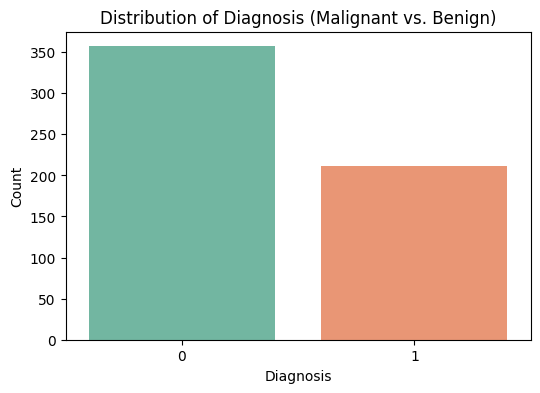

In [ ]:
# Distribution of the target variable (diagnosis)
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.title('Distribution of Diagnosis (Malignant vs. Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


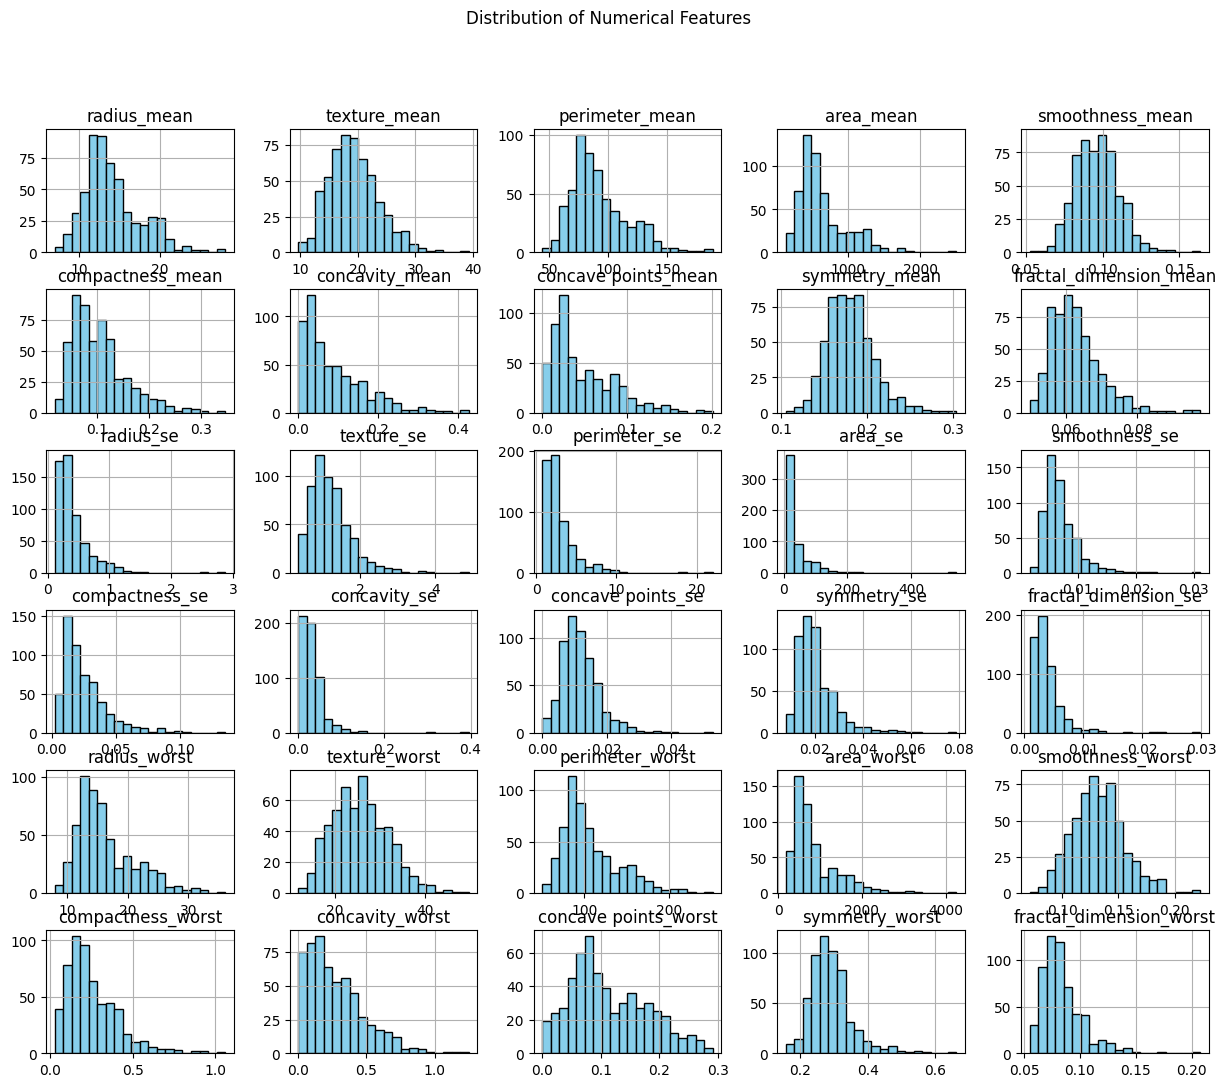

In [ ]:
# Plot histograms for all numerical features
data.drop(columns='diagnosis').hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

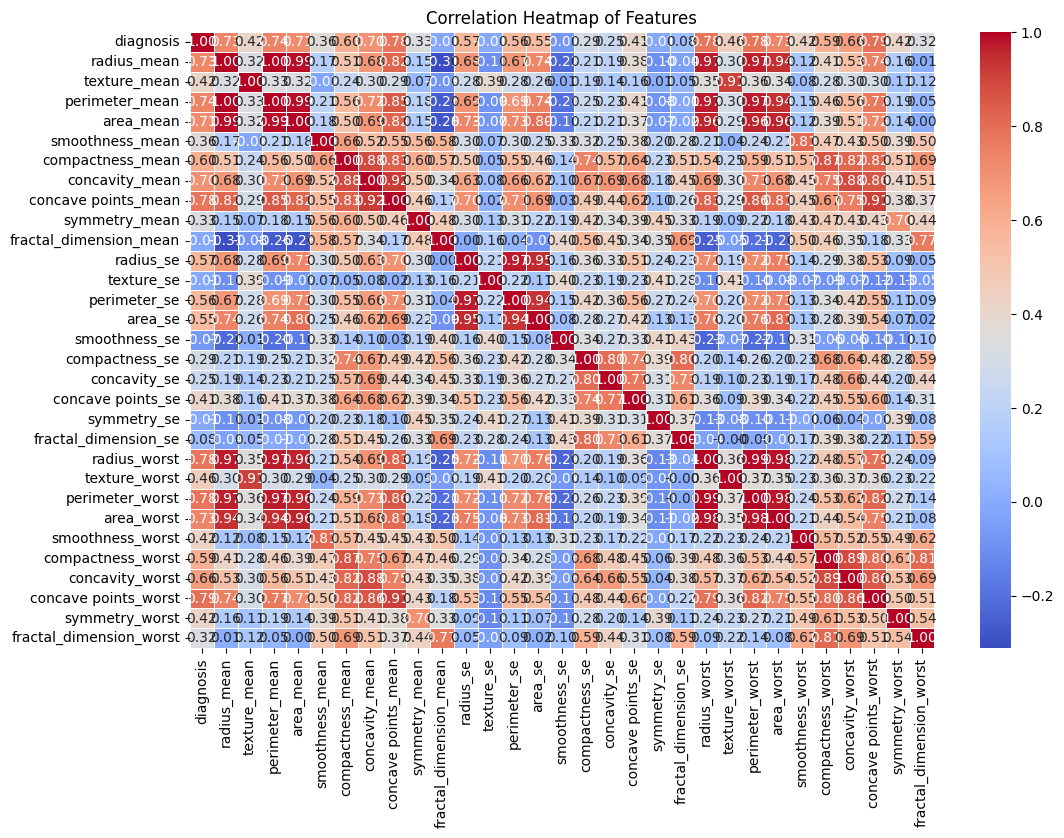

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
